In [1]:
#pip install pandas

In [2]:
#pip install matplotlib

In [3]:
#pip install seaborn

In [4]:
#pip install statsmodels

In [5]:
#pip install datetime

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 

## Data Frame de entrenamiento 

In [7]:
df_train= pd.read_csv("ds-programming-test/train_set.csv")

/tmp/ipykernel_2419/2365136975.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train= pd.read_csv("ds-programming-test/train_set.csv")


In [8]:
df_train.head(1)

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.74892,-118.275192,33.74892,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127


In [9]:
df_train.shape

(700000, 14)

Es necesario primero revisar si hay valores NAN en el data frame, pues podrían representar un problema al momento de hacer el modelo predictivo 

In [10]:
df_train.isnull().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_lat               5563
start_lon               5563
end_lat                18574
end_lon                18574
bike_id                    0
plan_duration            208
trip_route_category        0
passholder_type         2576
start_station              0
end_station                0
dtype: int64

recuérdese que el diccionario de datos es: 

- trip_id: identificador único para el viaje
- duration: duración del viaje en minutos
- start_time: dia/hora donde en viaje inicia en formato ISO 8601 tiempo local
- end_time: dia/hora donde el viaje termina en formato ISO 8601 tiempo local
- start_station: la estación donde el viaje inició
- start_lat: la latitud de la estación donde el viaje se originó
- start_lon: la longitud de la estación donde el viaje se originó
- end_station: la estación donde el viaje terminó
- end_lat: la latitud de la estación donde terminó el viaje
- end_lon: la longitud de la estación donde terminó el viaje
- bike_id: un entero único que identifica la bicicleta
- plan_duration: número de días que el usuario tendrá el paso. 0 significa un viaje único
(Walk-up plan)
- trip_route_category: “Round trip” son viajes que empiezan y terminan en la misma
estación
- passholder_type: El nombre del plan de passholder


## Data frame de prueba 

In [11]:
df_test= pd.read_csv("ds-programming-test/test_set.csv")

/tmp/ipykernel_2419/3909927009.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test= pd.read_csv("ds-programming-test/test_set.csv")


In [12]:
df_test.head(1)

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,start_station,end_station
0,17059130,12,1/1/2017 0:24,1/1/2017 0:36,34.058319,-118.246094,34.058319,-118.246094,6351,Round Trip,3028,3028


In [13]:
df_test.shape

(569886, 12)

In [14]:
df_test.isnull().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_lat               4622
start_lon               4622
end_lat                14891
end_lon                14891
bike_id                    0
trip_route_category        0
start_station              0
end_station                0
dtype: int64

Observamos que las variables predictoras entre ambos conjuntos diferentes en cantidad, por lo que para ver qué variables no están presentes en uno u otro data frame se realiza:

In [15]:
train_list=df_train.columns.values.tolist()

In [16]:
test_list=df_test.columns.values.tolist()

In [17]:
arr_res=[] # lista se resultados para el output
for elemen2 in train_list:
    if elemen2 not in test_list:
        arr_res.append(elemen2)

print(arr_res)

['plan_duration', 'passholder_type']


por lo tanto las variables que sí están presentes en el conjunto de entrenamiento pero no en el de prueba son los anteriores mostrados. 

# Análisis exploratorio
## Saturación del servicio 

La empresa busca contar con la disponibilidad más alta
de servicio en el mercado, por lo que se quiere entender cómo se comporta la
demanda de servicio en las distintas estaciones y horarios para cada plan. Por lo tanto las variables importantes en este primer análisis exploratorio son:

* start_station

* end_station

* start_time

* end_time

Afortundamente para este caso no hay valores NAN tanto en el df de entrenamento como en el de prueba.

In [18]:
import seaborn as sns

In [19]:
df0 = df_train["trip_id"]

In [20]:
df1 = df_train["start_station"]

In [21]:
df2 = df_train["end_station"]

In [22]:
df3 = df_train["start_time"]

In [23]:
df4 = df_train["end_time"]

In [24]:
df5 = df_train["passholder_type"]

Se toman solo aquellas variables predictoras que nos sean útiles para analizar la saturación del servicio.

In [25]:
result = pd.concat([df0,df1,df2,df3,df4,df5],axis=1,join="inner")

In [26]:
result

,trip_id,start_station,end_station,start_time,end_time,passholder_type
0,101750280,4127,4127,2018-08-07 11:20:00,2018-08-07 11:55:00,Walk-up
1,46560345,3057,3062,9/17/2017 17:51,9/17/2017 18:23,Walk-up
2,120016336,3022,3062,2019-04-22 09:22:00,2019-04-22 09:28:00,Monthly Pass
3,129547190,4304,4311,9/22/2019 11:27,9/22/2019 13:45,One Day Pass
4,136619463,4266,4443,1/31/2020 17:11,1/31/2020 17:25,Monthly Pass
...,...,...,...,...,...,...
699995,83666862,3032,4220,2018-04-25 18:32:00,2018-04-25 18:49:00,Monthly Pass
699996,132547303,3036,3014,2019-11-12 16:49:10,2019-11-12 16:58:51,Monthly Pass
699997,67332628,3032,3007,2018-01-13 15:49:00,2018-01-13 15:55:00,Flex Pass
699998,114846232,3067,3006,2019-02-04 14:16:00,2019-02-04 14:19:00,Walk-up


In [27]:
from datetime import datetime

In [28]:
type(df3[0])

str

In [29]:
##df3_series = pd.to_datetime(df3)

In [30]:
df3_series = df3.astype("datetime64[ns]")

In [31]:
type(df3_series[0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
##df4_series = pd.to_datetime(df4)

In [33]:
df4_series = df4.astype("datetime64[ns]")

In [34]:
#df4_series[0]

In [35]:
result_new = pd.concat([df0,df1,df2,df3_series,df4_series,df5],axis=1,join="inner")

In [36]:
result_new

,trip_id,start_station,end_station,start_time,end_time,passholder_type
0,101750280,4127,4127,2018-08-07 11:20:00,2018-08-07 11:55:00,Walk-up
1,46560345,3057,3062,2017-09-17 17:51:00,2017-09-17 18:23:00,Walk-up
2,120016336,3022,3062,2019-04-22 09:22:00,2019-04-22 09:28:00,Monthly Pass
3,129547190,4304,4311,2019-09-22 11:27:00,2019-09-22 13:45:00,One Day Pass
4,136619463,4266,4443,2020-01-31 17:11:00,2020-01-31 17:25:00,Monthly Pass
...,...,...,...,...,...,...
699995,83666862,3032,4220,2018-04-25 18:32:00,2018-04-25 18:49:00,Monthly Pass
699996,132547303,3036,3014,2019-11-12 16:49:10,2019-11-12 16:58:51,Monthly Pass
699997,67332628,3032,3007,2018-01-13 15:49:00,2018-01-13 15:55:00,Flex Pass
699998,114846232,3067,3006,2019-02-04 14:16:00,2019-02-04 14:19:00,Walk-up


Para ver las diferentes estaciones que se representan en los datos en cantidad (porque en cualidad no es posible saberlo debido a que sólo se tiene un ID)

In [37]:
len(result_new.start_station.unique()) #estaciones donde inicia el viaje

364

In [38]:
len(result_new.end_station.unique()) # estaciones donde termina el viaje

369

In [39]:
result_new.isnull().sum()

trip_id               0
start_station         0
end_station           0
start_time            0
end_time              0
passholder_type    2576
dtype: int64

Vemos que la única columna que tiene NAN es passholder_type con 2576 valores NAN.Eliminar estos datos en este caso es la mejor opción puesto que comparado con el data frame completo es una minoría; no se perderían tantos datos. Además porque tratándose de variables categóricas no se puede utilizar un criterio como tomar el promedio, pues eso sólo es posible con dtos numéricos. Quizá podría tomarse a la categoría con mayor frecuencia como alternativa, pero tratándose de tantos datos podría dar resultados inconsistentes al momento de crear el modelo predictivo. Por ello lo mejor es quitarlos y así no perjudicar al modelo predictivo.

In [40]:
result_new = result_new[result_new['passholder_type'].notna()]

In [41]:
result_new.shape

(697424, 6)

In [42]:
result_new.isnull().sum()

trip_id            0
start_station      0
end_station        0
start_time         0
end_time           0
passholder_type    0
dtype: int64

Con esto se han eliminado los valores NAN del data frame.

### Análisis exploratorio de estaciones con más demanda

Para el siguiente análisis exploratorio dada la cantidad de estaciones iniciales diferentes en este caso ***364***, resulta poco práctico hacer un análisis gráfico con todos ellos, por lo que podríamos escoger un umbral a partir del cual podríamos decir que es relevante estudiar esos casos en particular dada la afluencia de gente que hay en esas estaciones y tener claridad sobre la demanda en esas estaciones. Dada la cantidad de datos que tenemos podemos fijar un umbral de **1500** usuarios. Estaciones con esta cantidad o mayor de usuarios serán "relevantes" para nosotros y las que sean inferiores a esta cantidad serán ignoradas para el análisis exploratorio.

In [43]:
pd.set_option("display.max_rows",400)

In [44]:
#Data frame de estaciones relevantes (únic columna)
df_rel_stat= result_new['start_station'].value_counts().to_frame().reset_index()

In [45]:
df_rel_stat.head()

,index,start_station
0,3005,28377
1,3030,20261
2,3014,18726
3,4214,17463
4,3031,17024


In [46]:
df_rel_stat.shape

(364, 2)

Hacemos ahora el filtro mencionado con el umbral de 1500 usuarios:

In [47]:
df_rel_stat=df_rel_stat.loc[df_rel_stat["start_station"]>10000]
df_rel_stat = df_rel_stat.rename(columns={'index': 'trip_id','start_station': 'start_station_count'})

In [48]:
df_rel_stat
#trip_id 

,trip_id,start_station_count
0,3005,28377
1,3030,20261
2,3014,18726
3,4214,17463
4,3031,17024
5,3035,15316
6,3064,14698
7,3082,13647
8,4210,13347
9,3042,12656


En la anterior tabla se muestran las estaciones con mayor afluencia de ususarios, siendo la estación 3005 la de mayor afluencia, con un total de 28377 ususarios.

### Análisis exploratorio de fechas más demandas del servicio

A continuación se hace un análisis gráfico por años de mayor demanda del servicio de bicicletas  de todo el histórico de datos.

Text(0, 0.5, 'Cantidd de usuarios')

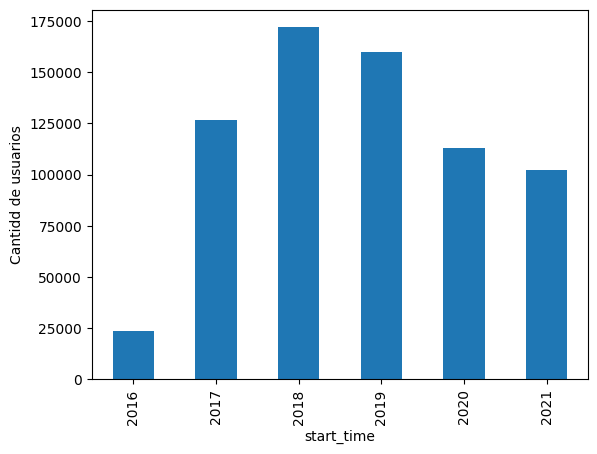

In [49]:
(result_new.loc[result_new["start_time"].dt.year.between(2015, 2022), 'start_time']
       #.dt.to_period("M")
       #.value_counts()
       .groupby(result_new["start_time"].dt.year)
       .count()
       #.sort_index()
       .plot(kind="bar")
       .set_ylabel("Cantidd de usuarios")
       
)

Sería interesante saber en que meses hay mayor demanda para centrar nuestra atención en ellos y así la empresa pueda instrumentar estrategías para satisfacer la demanda en esos meses, por ejemplo haciendo una redistribución de bicicletas en aquellas zonas y aumentar la cantidad de bicicletas disponible, sólo en esos meses. Analicemos por ejemplo el caso de los últimos 3 años:

<AxesSubplot: >

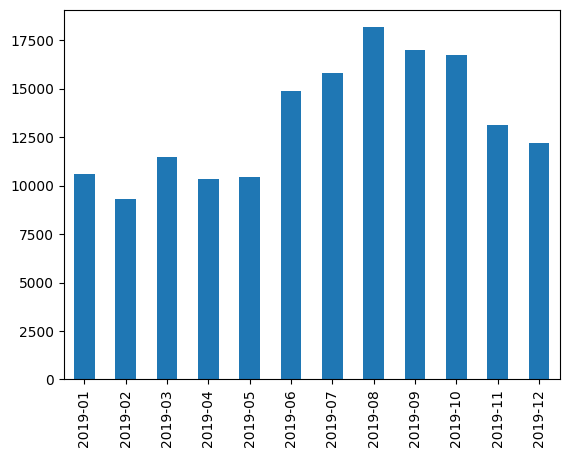

In [50]:
(result_new.loc[result_new["start_time"].dt.year.between(2019, 2019), 'start_time']
       .dt.to_period("M")
       .value_counts()
       #.groupby(res_new_10["start_time"].dt.year)
       #.count()
       .sort_index()
       .plot(kind="bar")
)

<AxesSubplot: >

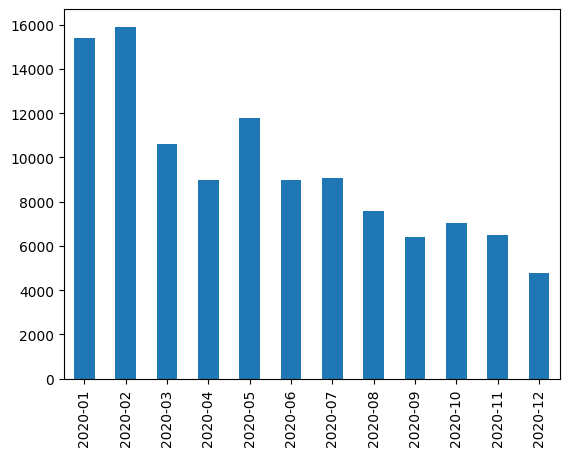

In [51]:
(result_new.loc[result_new["start_time"].dt.year.between(2020, 2020), 'start_time']
       .dt.to_period("M")
       .value_counts()
       #.groupby(res_new_10["start_time"].dt.year)
       #.count()
       .sort_index()
       .plot(kind="bar")
)

<AxesSubplot: >

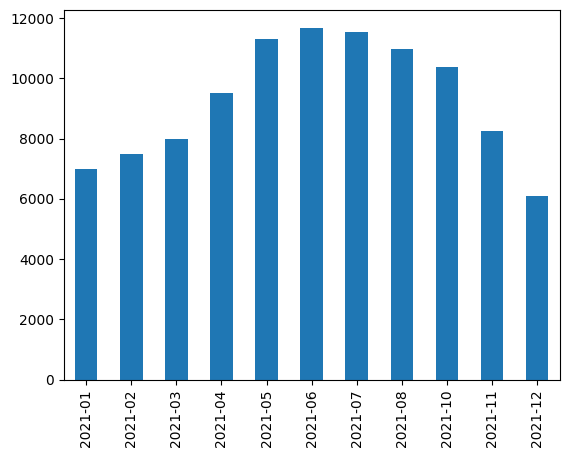

In [52]:
(result_new.loc[result_new["start_time"].dt.year.between(2021, 2021), 'start_time']
       .dt.to_period("M")
       .value_counts()
       #.groupby(res_new_10["start_time"].dt.year)
       #.count()
       .sort_index()
       .plot(kind="bar")
)

Observando los gráficos anteriores vemos que han tenido en general comportamientos diferentes durante el año. En el año 2020 la tendencia fue a la baja esto pudo deberse incluso a las restricciones que hubo durante la pandemia, por las cuestiones de movilidad. En el caso del año 2019 se observa un clara diferencia en donde la tendencia siempre fue prácticamente constante a excepción del mes de junio en adelante en donde se observa una distribución de tipo gaussiano. En al año 2021 hubo un comportamiento de tipo gaussiano a lo largo de todo el año. Para tener más certeza de cómo se comporta la afluencia de gente por mes, grafiquemos los años restantes: **2016**, **2017** y **2018**

<AxesSubplot: >

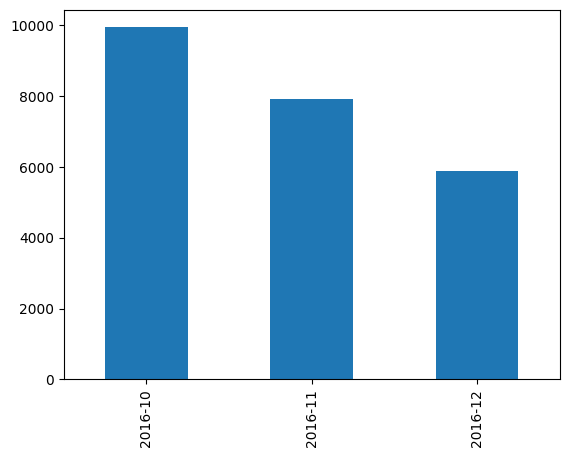

In [53]:
(result_new.loc[result_new["start_time"].dt.year.between(2016, 2016), 'start_time']
       .dt.to_period("M")
       .value_counts()
       #.groupby(res_new_10["start_time"].dt.year)
       #.count()
       .sort_index()
       .plot(kind="bar")
)

<AxesSubplot: >

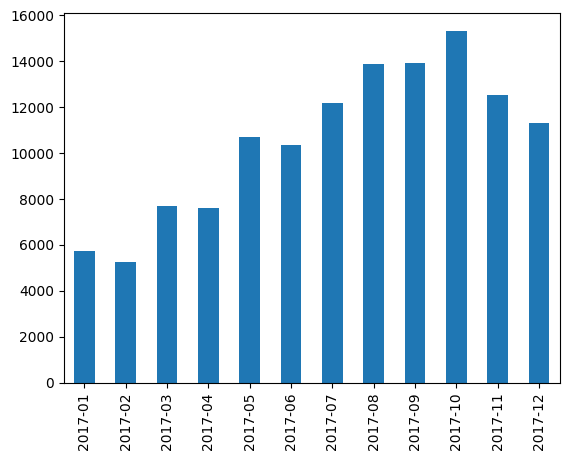

In [54]:
(result_new.loc[result_new["start_time"].dt.year.between(2017, 2017), 'start_time']
       .dt.to_period("M")
       .value_counts()
       #.groupby(res_new_10["start_time"].dt.year)
       #.count()
       .sort_index()
       .plot(kind="bar")
)

<AxesSubplot: >

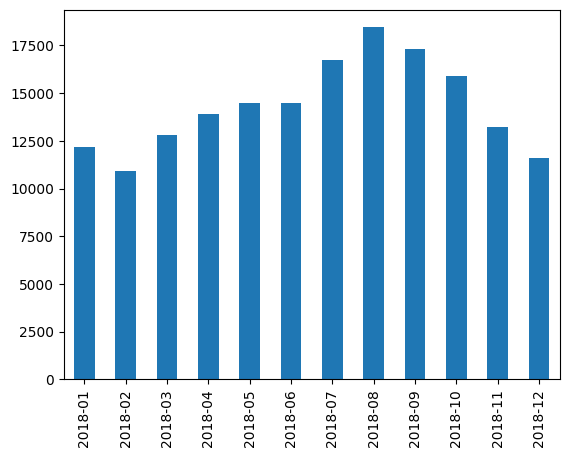

In [55]:
(result_new.loc[result_new["start_time"].dt.year.between(2018, 2018), 'start_time']
       .dt.to_period("M")
       .value_counts()
       #.groupby(res_new_10["start_time"].dt.year)
       #.count()
       .sort_index()
       .plot(kind="bar")
)

Omitiendo el caso del año 2016, debido a que sólo tiene información de tres meses, vemos que tanto para el año 2018 como del año 2017, sigue una distribución gaussiana, por lo que para el análisis por días podríamos tomar alguno de los meses centrales por ejemplo el mes 08 (agosto) del 2021 para hacer un análisis por día y concluir haciendo un análisis por hora.

## Crecimiento de Planes

Para analizar el crecimiento que tuvieron los diferentes tipos de planes se propone, para propósitos del análisis exploratorio, hacer un análisis por año y por día del mes. Restringiendo así el análisis, podrán obtenerse gráficos que sean ilustrativos y nos puedn dar una visión general del comportamiento que se tiene mes a mes y día por día. 

In [56]:
result_new.head(3)

,trip_id,start_station,end_station,start_time,end_time,passholder_type
0,101750280,4127,4127,2018-08-07 11:20:00,2018-08-07 11:55:00,Walk-up
1,46560345,3057,3062,2017-09-17 17:51:00,2017-09-17 18:23:00,Walk-up
2,120016336,3022,3062,2019-04-22 09:22:00,2019-04-22 09:28:00,Monthly Pass


Con la siguiente lìnea de código podemos obervar que para las categórías de los planes "passholder_type" se cuentan con  6 valores únicos:

In [57]:
result_new['passholder_type'].unique()

array(['Walk-up', 'Monthly Pass', 'One Day Pass', 'Annual Pass',
       'Flex Pass', 'Testing'], dtype=object)

In [58]:
result_new.shape

(697424, 6)

### --------------------
### Copia del data frame
### --------------------

Creamos una copia llamada "result_new_mod" del dataframe "result_new" para en caso de equivocarnos volver a ejecutar esta línea y no modificar el data frame original.

In [59]:
result_new_mod= result_new
result_new_mod.shape

(697424, 6)

In [60]:
#import time
#import datetime
from datetime import datetime

In [61]:
import datetime

In [62]:
date_obj=datetime.datetime.strptime("2017-01-01",'%Y-%m-%d').date()

In [63]:
date_obj

datetime.date(2017, 1, 1)

"result_new_mod" es una copia del data frame "result_new" que fue el data frame que obtuvimos al hacer el filtro de valores NAN para la variable categórica 'passholder_type'del data frame original, y así facilitar tanto el análisis exploratorio como la creación del modelo predictivo que se hará más adelante. Se cambió el formato de fecha para que sólo estuvieran presentes al año el mes y el día como se ve a continuación:

Se cambia el formato de fechas de "start_time" para que sea más fácil el análisis gráfico pues tener tanta información como horas, minutos y segundos se vuelve innecesario para nuestros fines:

In [64]:
result_new_mod.start_time=result_new_mod.start_time.apply(lambda x: x.date())

/tmp/ipykernel_2419/3719541428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_new_mod.start_time=result_new_mod.start_time.apply(lambda x: x.date())


In [65]:
result_new_mod.head(2)

,trip_id,start_station,end_station,start_time,end_time,passholder_type
0,101750280,4127,4127,2018-08-07,2018-08-07 11:55:00,Walk-up
1,46560345,3057,3062,2017-09-17,2017-09-17 18:23:00,Walk-up


Volvemos a crear una copia del data frame ahora de result_new_mod

In [66]:
result_new_mod_2= result_new_mod

Filtramos ahora el data frame result_new_mod para tener sólo datos correspondientes al año 2017:

In [67]:
result_new_mod_2017=result_new_mod[result_new_mod_2['start_time'].between(datetime.datetime.strptime("2017-01-01",'%Y-%m-%d').date(),datetime.datetime.strptime("2018-01-01",'%Y-%m-%d').date())]

In [68]:
result_new_mod_2017.shape

(126949, 6)

Hacemos ahora otro filtro sólo para tener información correspondiente al mes de enero del año 2017:

In [69]:
result_new_mod_2017_enero = result_new_mod[result_new_mod_2['start_time'].between(datetime.datetime.strptime("2017-01-01",'%Y-%m-%d').date(),datetime.datetime.strptime("2017-02-01",'%Y-%m-%d').date())]

Con esto podemos hacer la restricción en los datos y dar un ejemplo de cómo se podría hacer el análisis mes con mes por categorías del tipo de plan por cada usuario en la base de datos. En este caso nos centraremos en los datos proporcionados para el **mes de enero del año 2017**.

De los más de 700 000 datos que tenemos en total del data frame original 5713 corresponden al mes de enero del año 2017, como se ve en la siguiente línea:

In [70]:
result_new_mod_2017_enero.shape

(5925, 6)

Se ordenan los datos del data frame por mes, esto resultará útil después cuando hagamos los gráficos de la afluencia de ususarios por cada día en el mes de enero de 2017 por categoría de tipo de plan. 

In [71]:
result_new_2017_enero_sort=result_new_mod_2017_enero.sort_values(by="start_time")

In [72]:
result_new_2017_enero_sort;

Dado que tenemos una cantidad de 5713 puntos por graficar, resultaría poco práctico tener una visualización por categoría todo en una sola gráfica, pues seria imposible hacer distinciones por día de cada mes. Por ello se realizará una iteración que sea capaz de segmentar esta información y podamos tener una visualización por día según el tipo de pase durante el mes de enero de 2017, de la afluencia total de usuarios. La gran ventaja de este tipo de gráfico que nos proporciona a librería de seaborn es que nos permite visualizar la cantidad de usuarios según el tipo de plan que el ususario posea(por categoría).

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


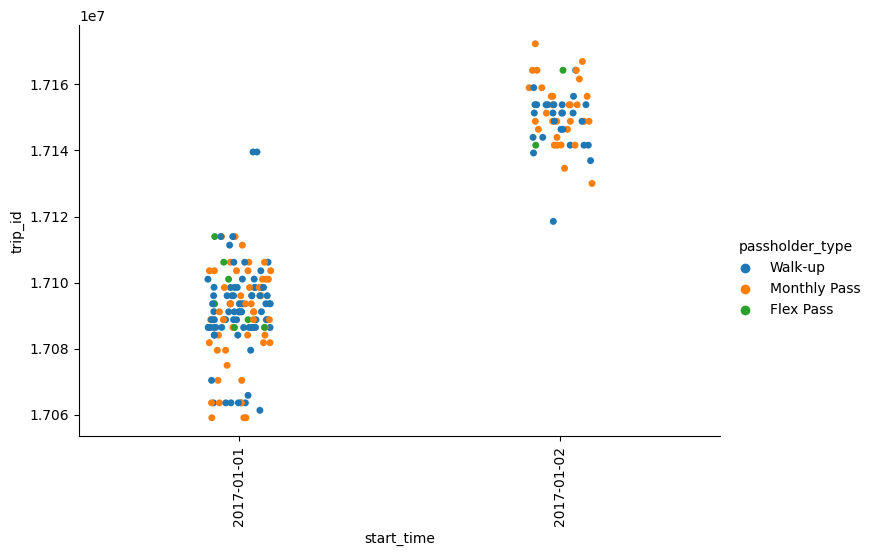

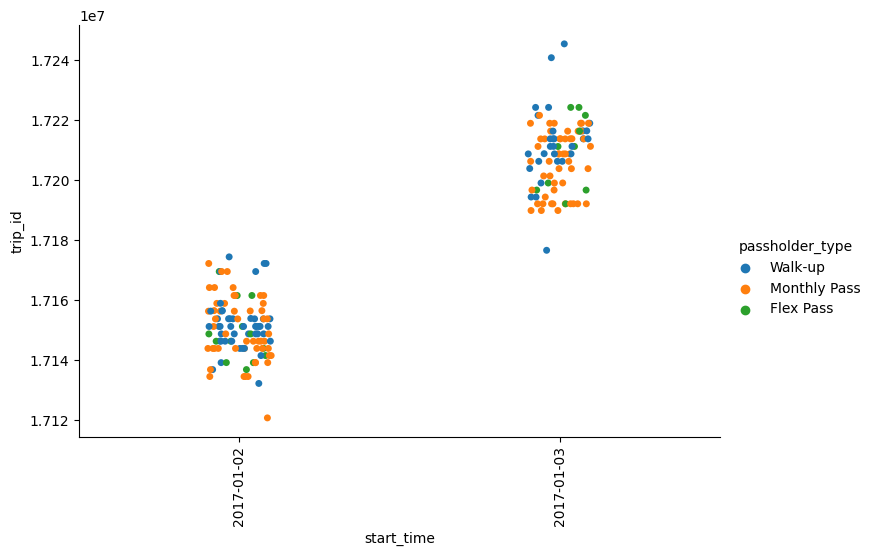

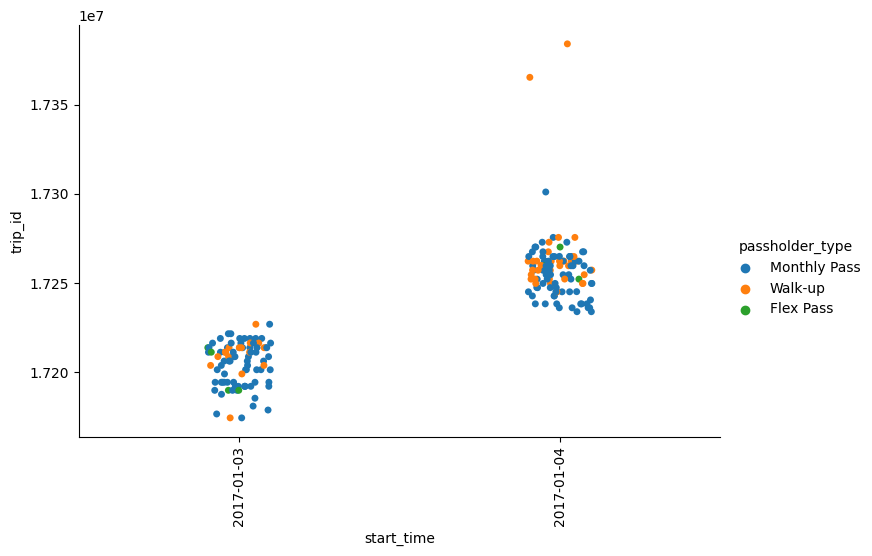

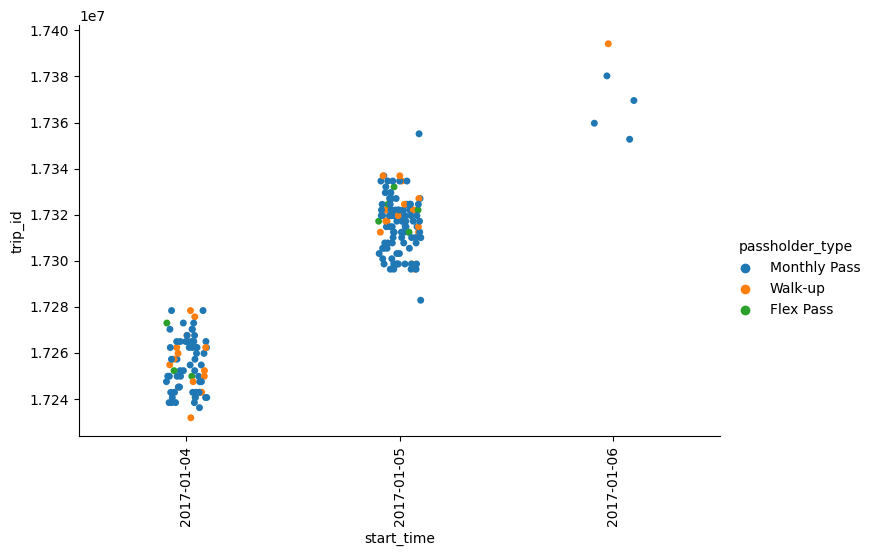

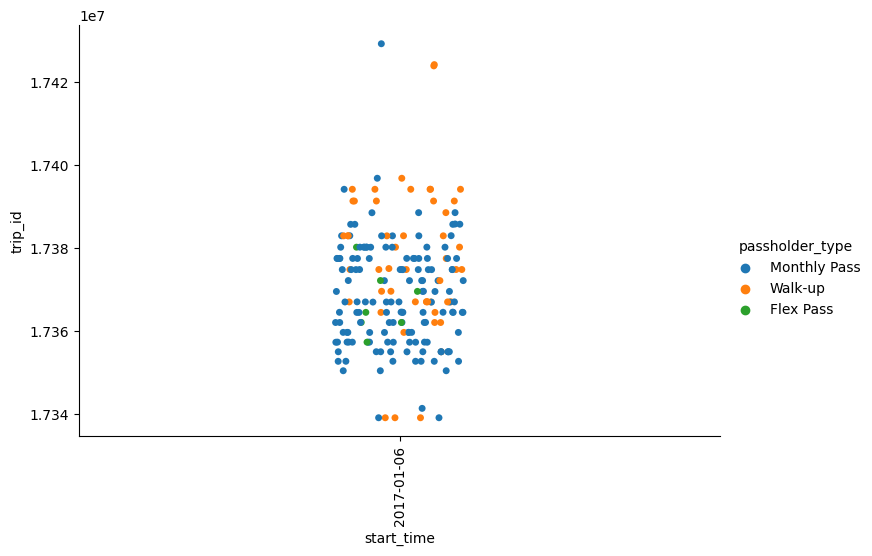

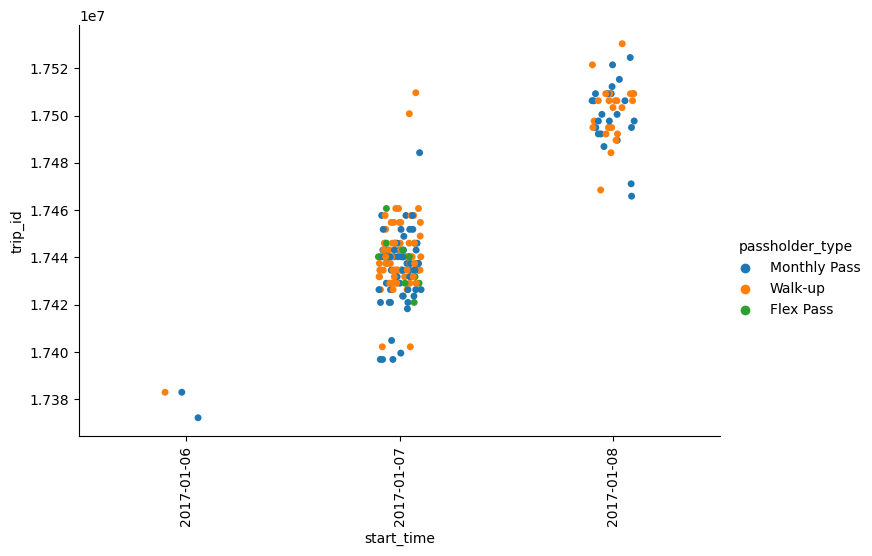

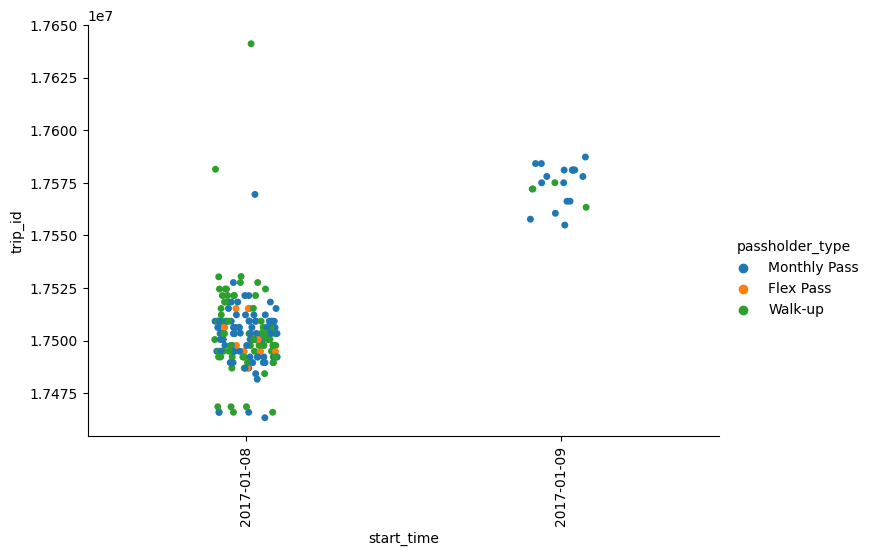

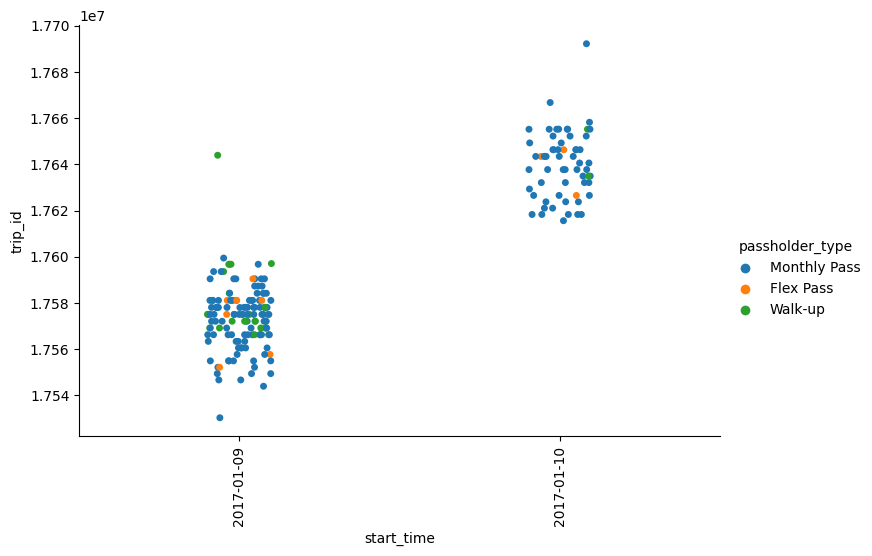

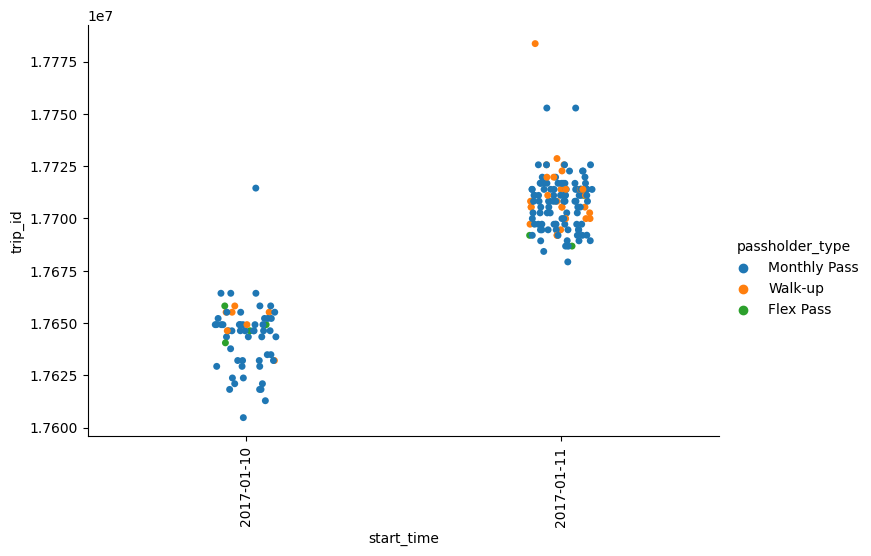

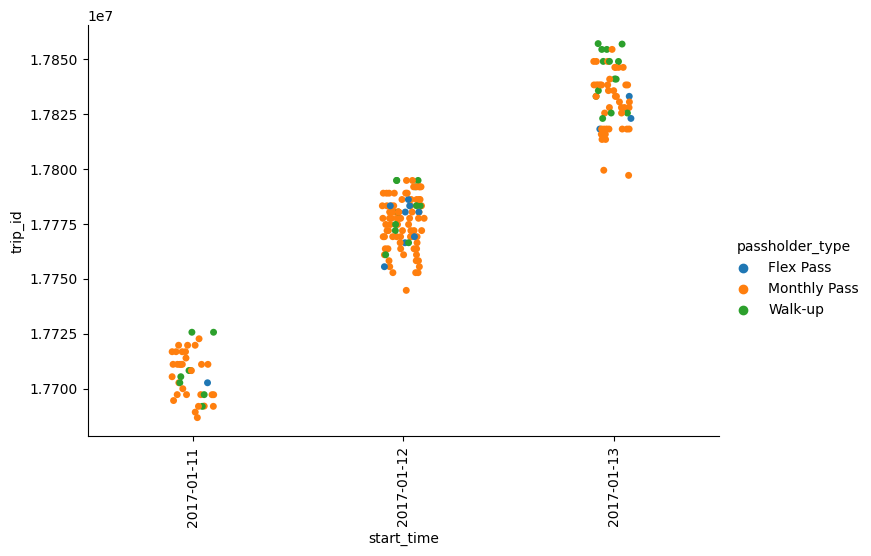

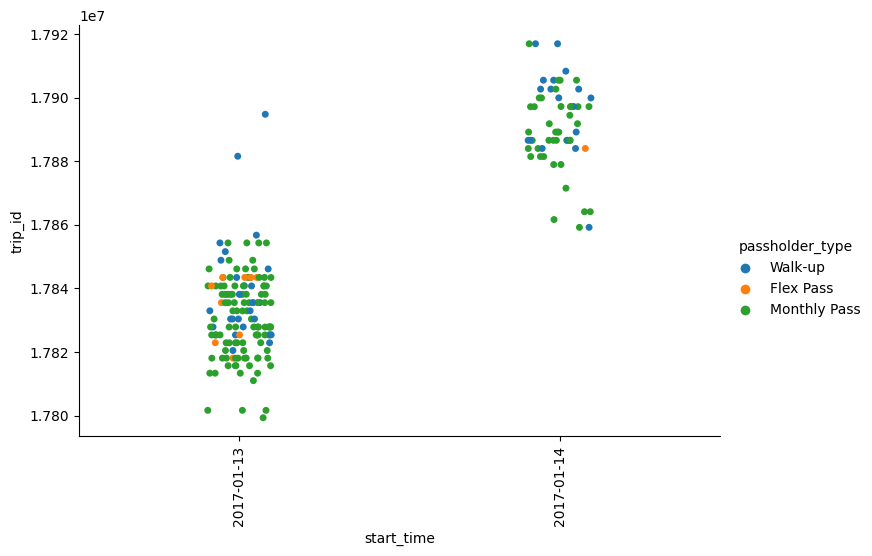

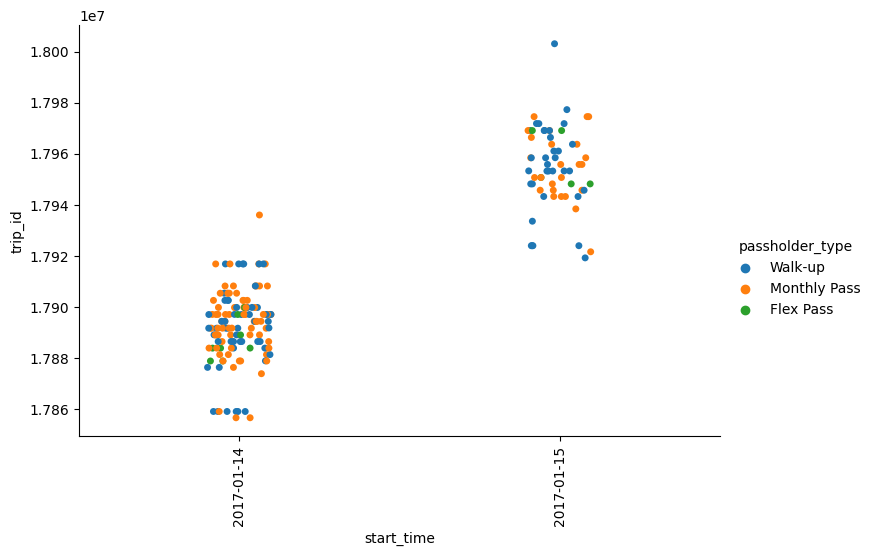

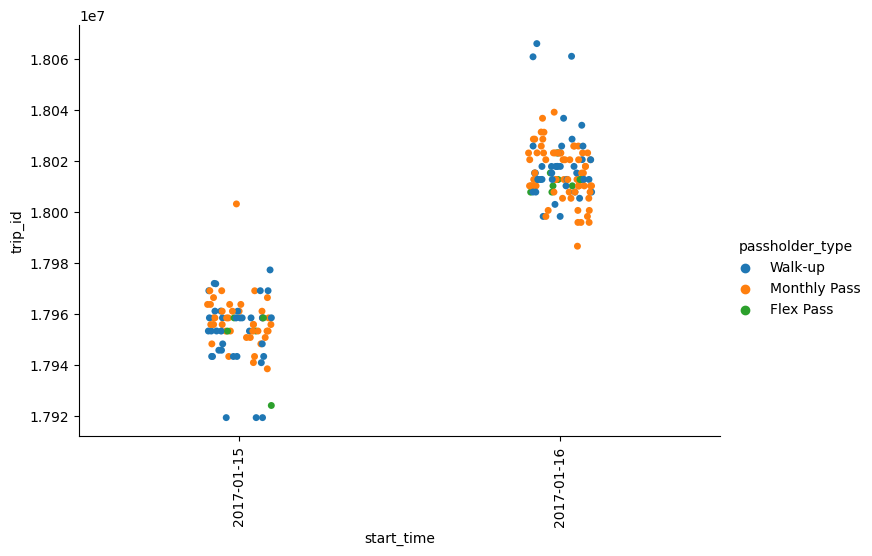

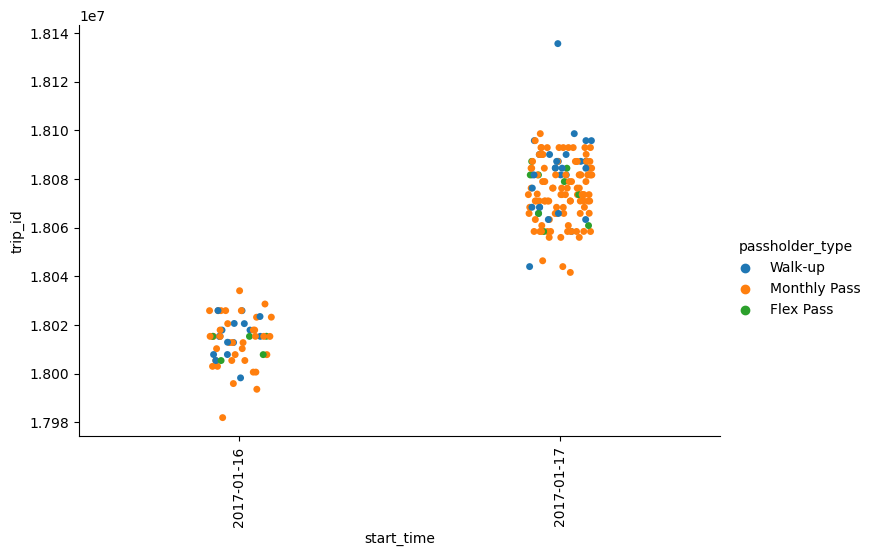

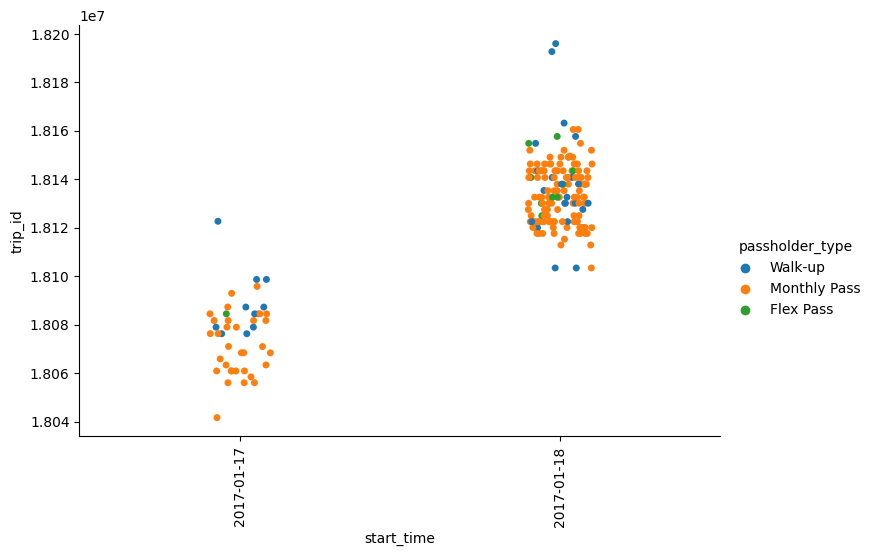

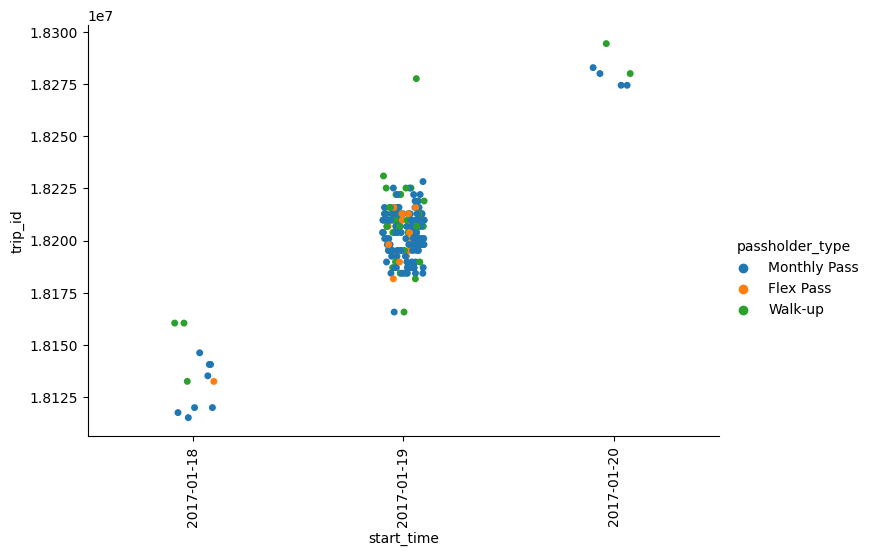

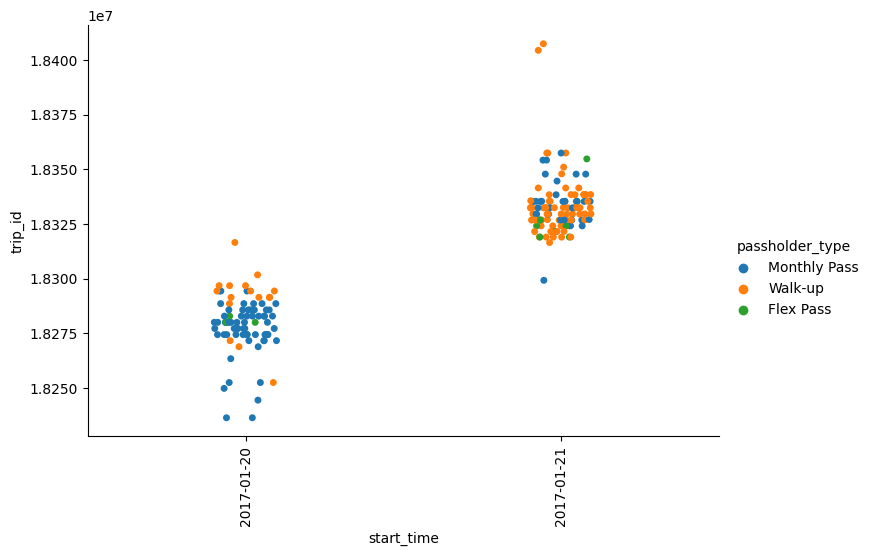

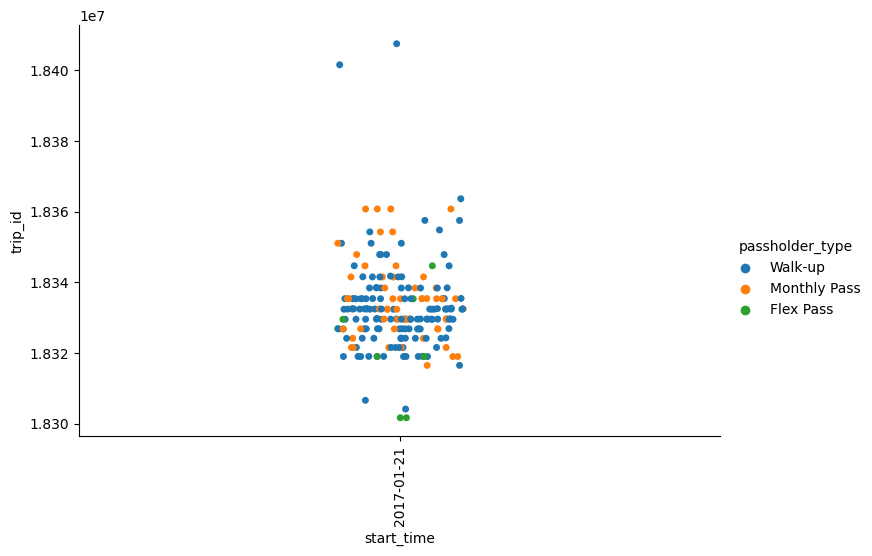

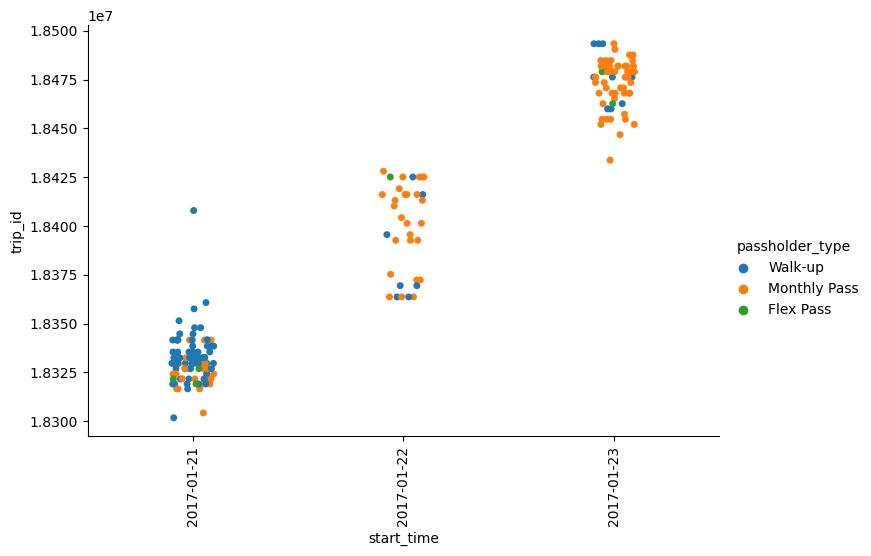

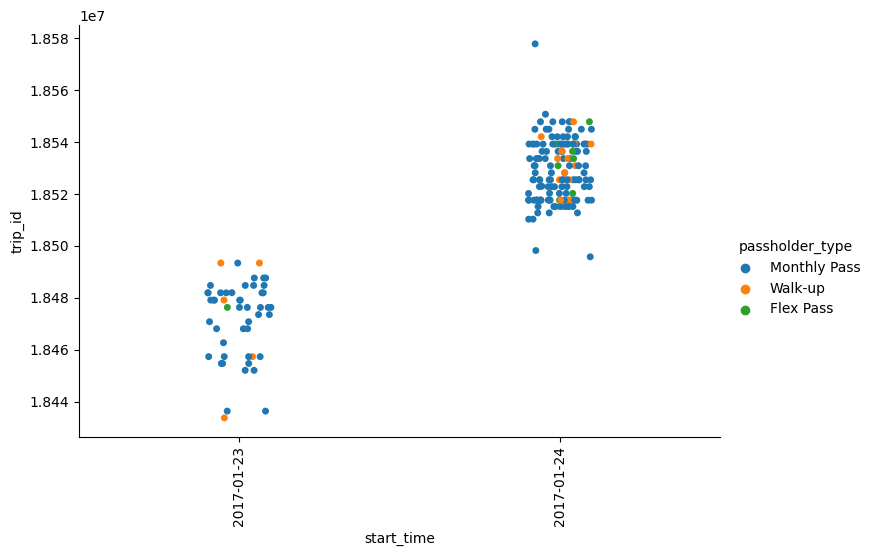

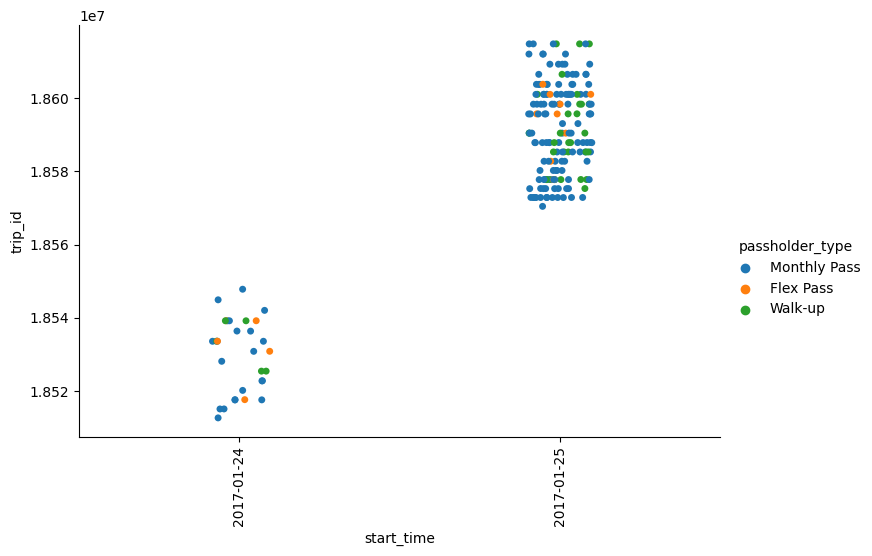

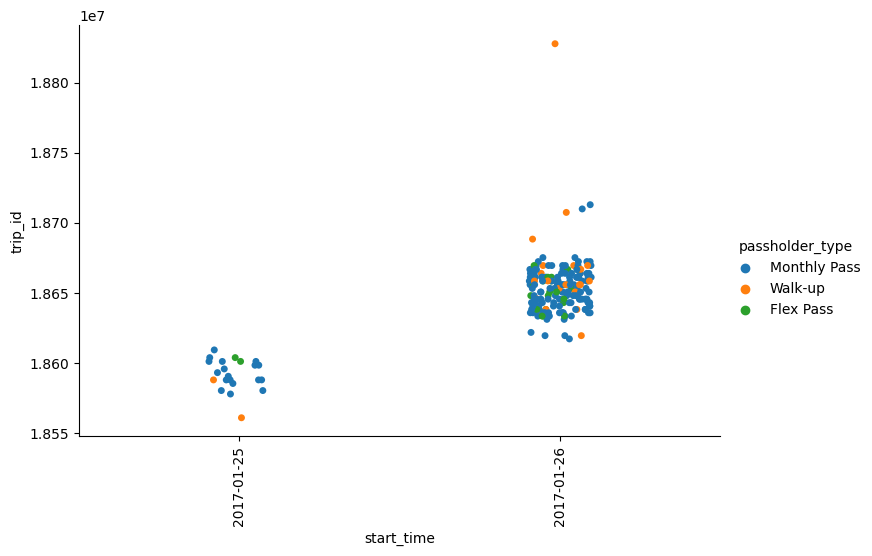

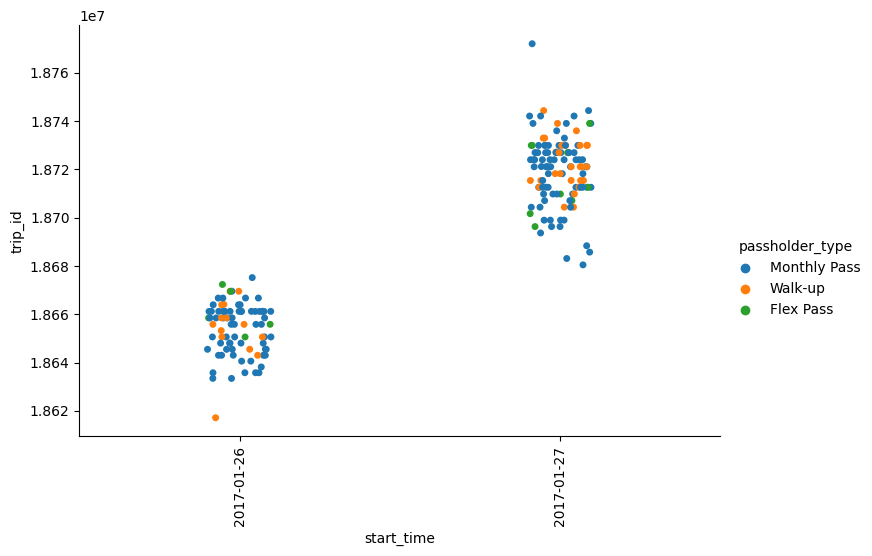

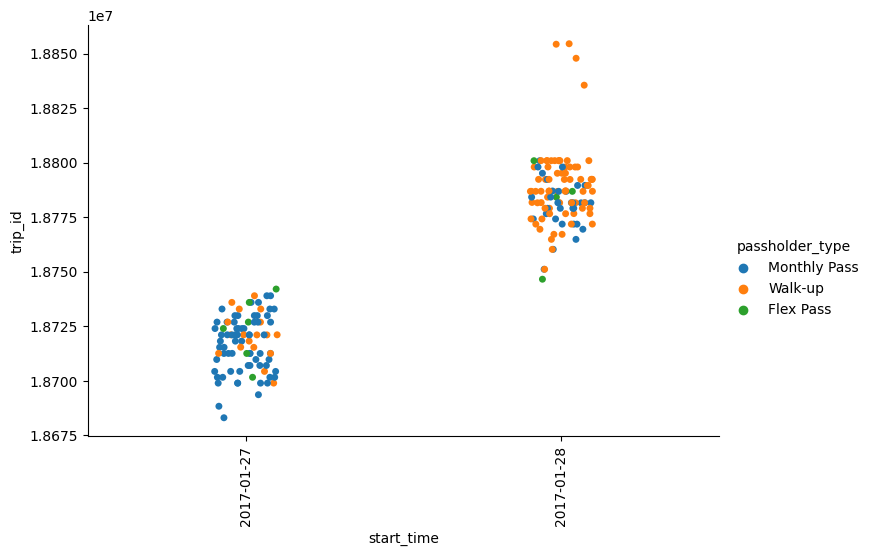

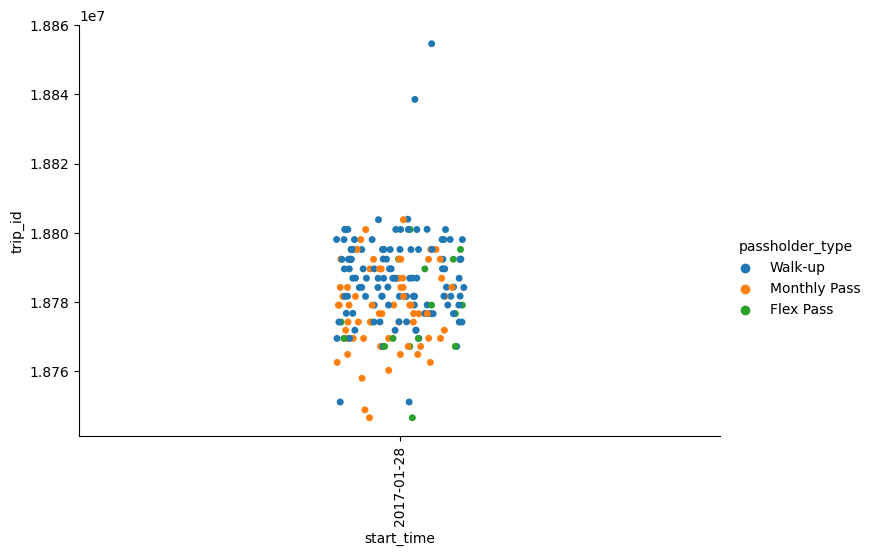

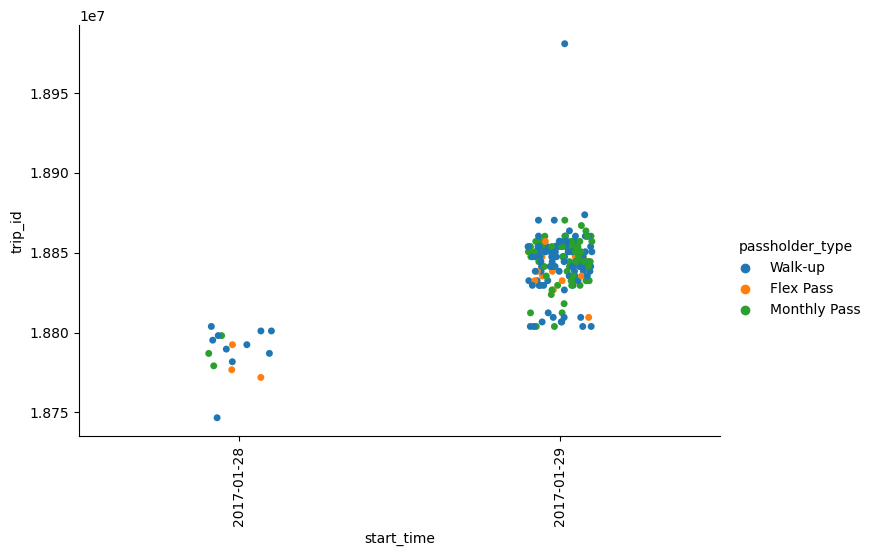

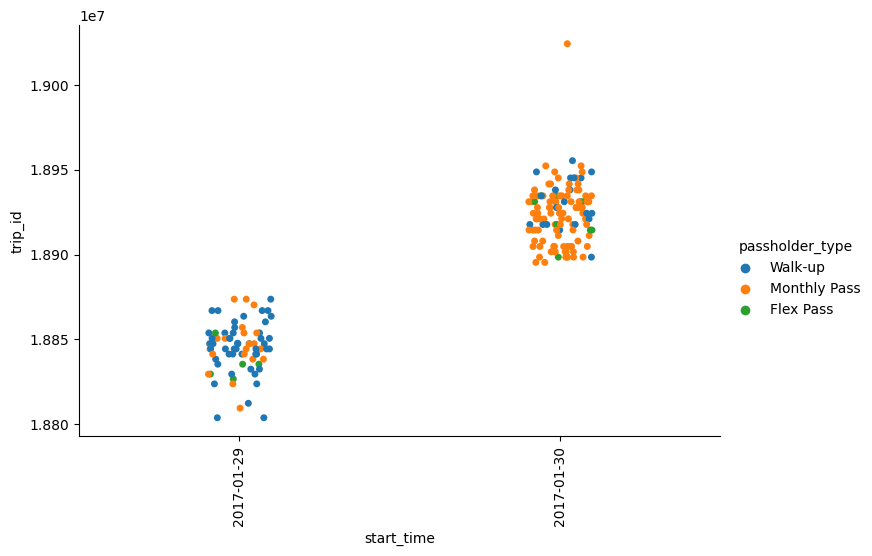

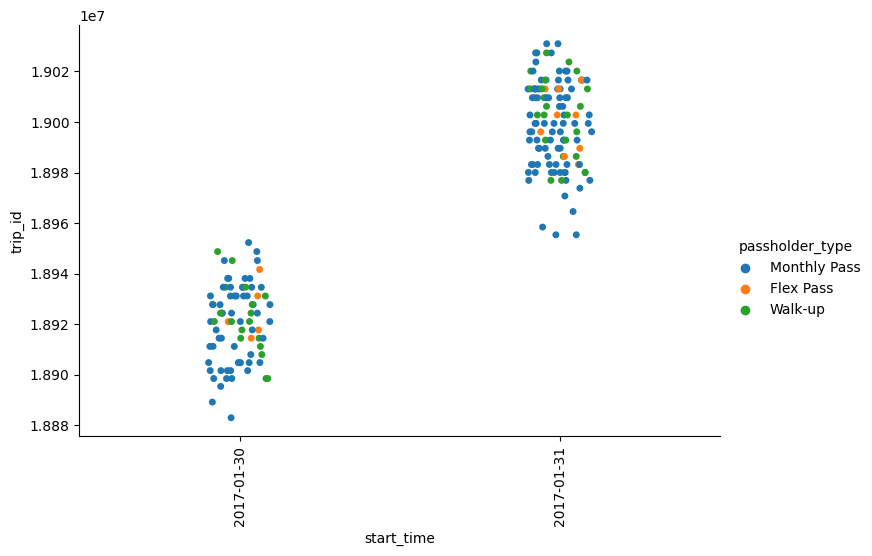

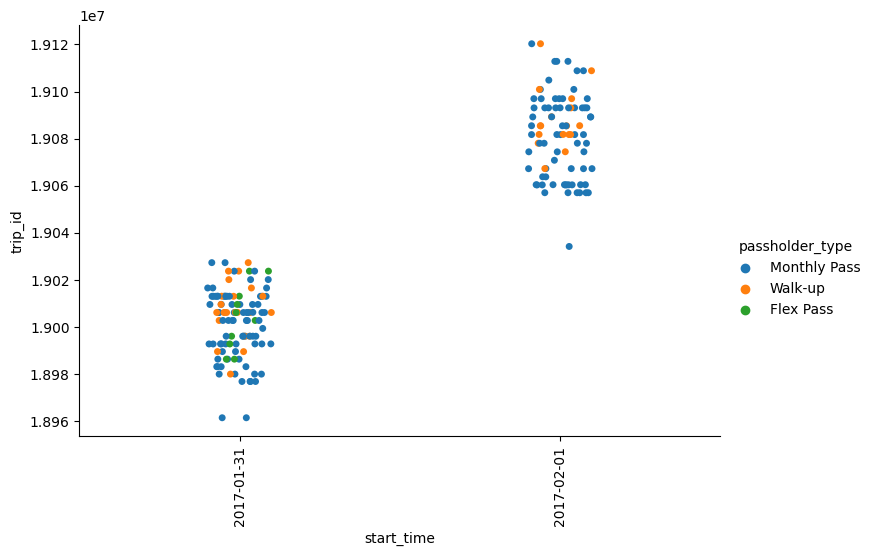

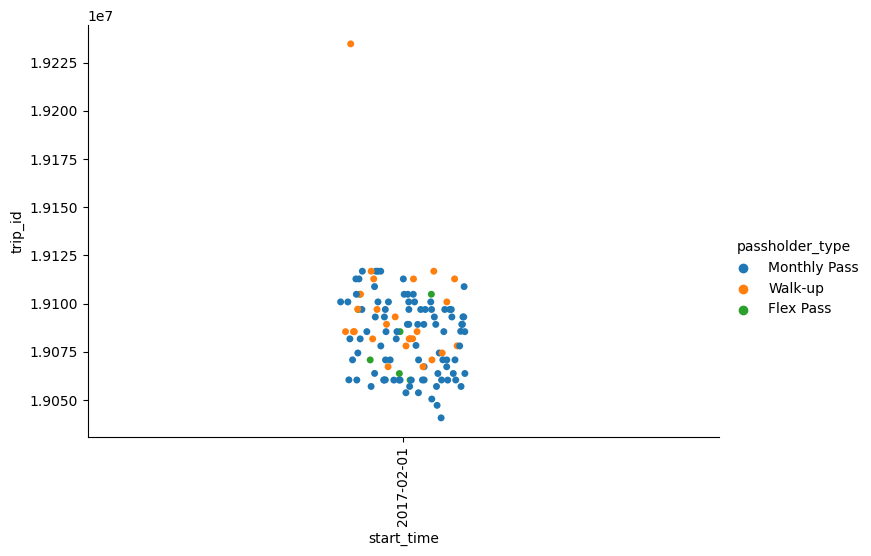

In [73]:
#filt_result_new_2017_ene_mod_sort.shape[0]
for i in range(0,result_new_2017_enero_sort.shape[0],200):
    fig1=sns.catplot(data=result_new_2017_enero_sort[i:i+200],x="start_time",y="trip_id",hue="passholder_type",aspect=1.5)
    fig1.set_xticklabels(rotation=90)

De las gráficas anteriores podemos obervar que hay claramente tres tipos de planes predomimantes que los ususarios utilizan en este mes en particular, siendo estos: Walk-up, Monthly Pass y Flex pass. Además un plan u otro resulta ser  predominante en su uso según el día. Otro aspecto, de hecho esperado es que durante los fines de semana (días 7,8,4,15,21,22,28 y 29) hay una clara mezcla entre varios planes que se usan de manera equitativa lo que es evidente en las gráficas que presentan diferentes colores sin una clara hegemonía por parte de algún plan. Sin embargo, en los días entre semana, se nota un claro dominio dle plan mensual por sobre los otros planes, puesto ue es de suponer que el tipo de personas qàus use men el servicio de bicicletas en este período de tiempo sean trabajadores que les conviene más un plan mensual por la alta frecuencia con la que usan este medio de transporte.

Se podría usar la misma lógica para crear más gráficos de este tipo y analizar el crecimiento anual o el que se haya dado por mes ,o decremento de planes según sea el caso. 